<a href="https://colab.research.google.com/github/sks95/Unsupervised-Learning/blob/main/Agglomerative_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Agglomerative Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
!unzip /content/archive.zip

Archive:  /content/archive.zip
  inflating: Mall_Customers.csv      


In [7]:
df = pd.read_csv("/content/Mall_Customers.csv")

In [8]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
df.drop("CustomerID", inplace=True, axis=1)

In [10]:
df.rename(
    columns = {
        "Annual Income (k$)": "AnnualIncome",
        "Spending Score (1-100)": "SpendingScore"
    }, inplace=True
)

In [11]:
df.head()

,Genre,Age,AnnualIncome,SpendingScore
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [12]:
df['Genre'] = df['Genre'].replace({
    "Male":1,
    "Female":0
})

df.head()

,Genre,Age,AnnualIncome,SpendingScore
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


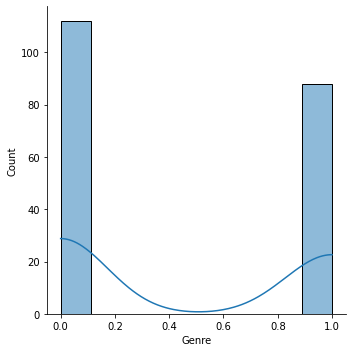

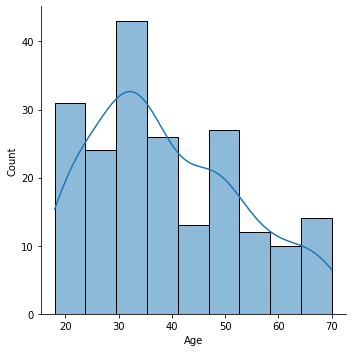

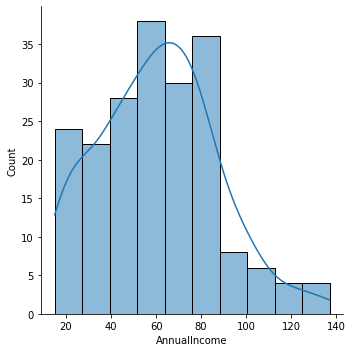

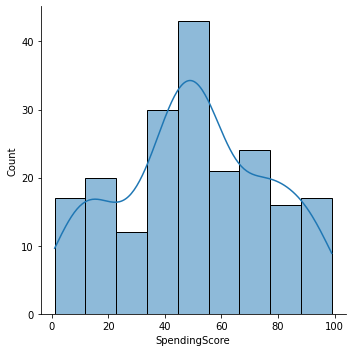

In [13]:
import seaborn as sns

for col in df.columns:
  sns.displot(df[col], kde=True)

In [16]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

# Single Method

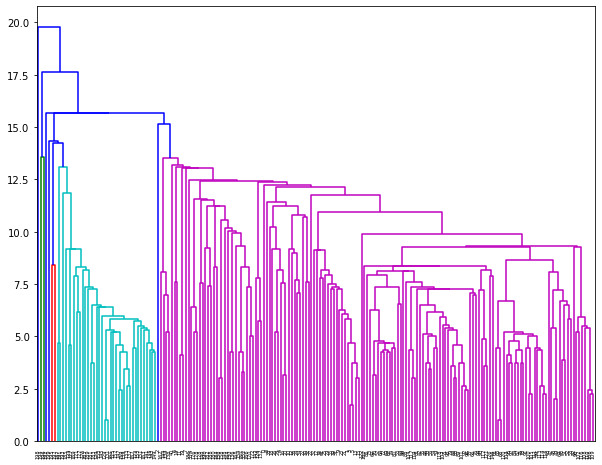

In [18]:
merg = linkage(df, method='single', metric='euclidean')

plt.figure(figsize = (10,8))
dendrogram(merg)
plt.show()

# Complete Method

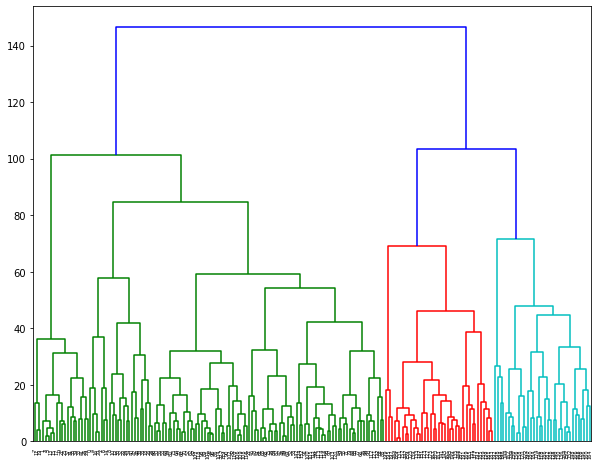

In [20]:
from scipy.cluster.hierarchy import linkage

merg = linkage(df, method='complete', metric='euclidean')

plt.figure(figsize=(10,8))
dendrogram(merg)
plt.show()

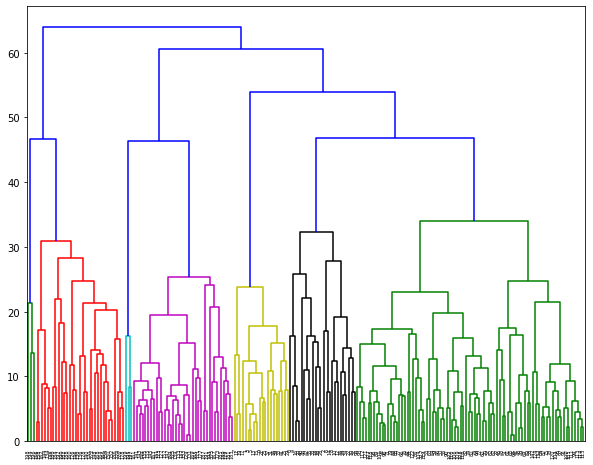

In [21]:
from scipy.cluster.hierarchy import linkage

merg = linkage(df, method='average', metric='euclidean')

plt.figure(figsize=(10,8))
dendrogram(merg)
plt.show()

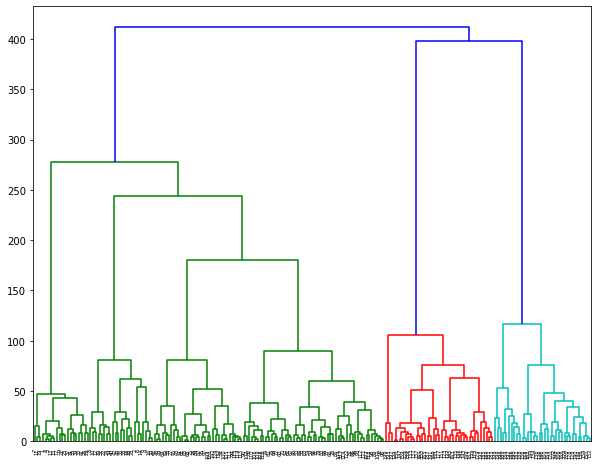

In [22]:
from scipy.cluster.hierarchy import linkage

merg = linkage(df, method='ward', metric='euclidean')

plt.figure(figsize=(10,8))
dendrogram(merg)
plt.show()

In [23]:
from scipy.cluster.hierarchy import cut_tree

y_pred = cut_tree(merg, n_clusters=3)

In [26]:
y_pred = y_pred.reshape(-1)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [27]:
df.head(1)

,Genre,Age,AnnualIncome,SpendingScore
0,1,19,15,39


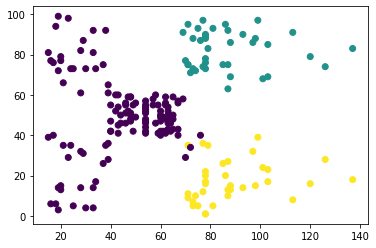

In [28]:
plt.scatter(df['AnnualIncome'], df['SpendingScore'], c = y_pred)

In [29]:
from scipy.cluster.hierarchy import cut_tree

y_pred = cut_tree(merg, n_clusters=5)
y_pred = y_pred.reshape(-1)

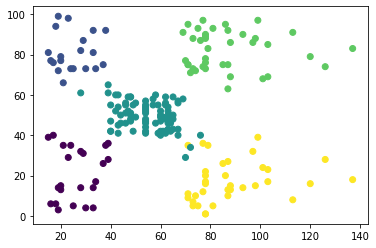

In [30]:
plt.scatter(df['AnnualIncome'], df['SpendingScore'], c = y_pred)

In [ ]:
from sklearn